# **Project: Plant Seedlings Classification**



### **Context:**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.




### **Objective:**

The aim of this project is to **use a deep learning model to classify plant seedlings through supervised learning.**


### **Data Description:**
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species at several growth stages.**

You are provided with a dataset of images of plant seedlings at various stages of growth.

- Each image has a filename that is its unique id.
- The dataset comprises 12 plant species.
- The goal of the project is to create a classifier capable of determining a plant's species from a photo.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet





### **Learning Outcomes:**
- Pre-processing of image data
- Visualization of images
- Building the CNN
- Evaluating the Model






In [1]:
#pip install tensorflow

In [2]:
#pip install opencv-python google-colab==1.0.0

In [3]:
#pip install opencv-python

## **Importing the necessary libraries**

In [4]:
import os
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import seaborn as sns
import numpy as np
import tensorflow as tf
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# GLOBAL VARIABLES
import warnings
warnings.filterwarnings('ignore')
seed = 7

## **Reading the dataset**

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [6]:
# os.chdir('/content/gdrive')

In [7]:
# Load the image file of dataset
images = np.load('images.npy')

# Load the labels file of dataset
labels = pd.read_csv('Labels.csv')

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [8]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 images of shape 128 x 128 each with 3 channels. Here, each image is an RGB image.

Let's plot the first 8 images 

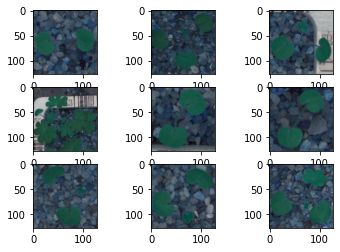

In [9]:
# Show some example images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])

Let's understand if the dataset is imbalanced or not 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

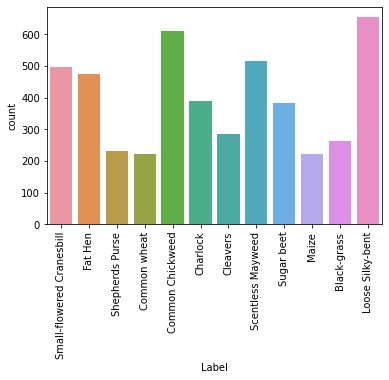

In [10]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

As you can see from the above plot, the dataset is quite balanced. But,we might need to stratify the train_test_split

## **Exploratory Data Analysis** 

### **Plotting mean images** 

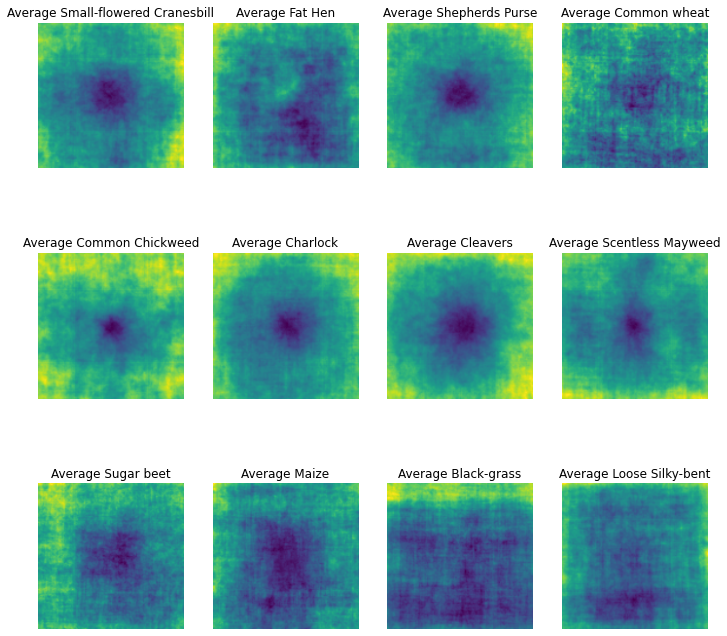

In [11]:
def find_mean_image(full_mat):
    # calculate the average
    mean_image = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_image = mean_image.reshape((150,150))
  
    return mean_image

CATEGORIES=labels['Label'].unique()
d={ i:[] for i in CATEGORIES}

for i in labels.index:
  gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray,(150,150))
  d[labels['Label'][i]].append(gray)

l=[]
for i in d.keys():
  l.append(find_mean_image(d[i]))

plt.subplots(figsize=(12,12))
for i in range(len(l)):
    plt.subplot(3,4,i + 1,title='Average '+list(d.keys())[i])
    plt.imshow(l[i])
    plt.axis('off')



* Small-flowered cranesbill, Shepherds Purse, Charlock, and Cleavers have similar kinds of shapes such as width and length of the leaves. They mostly have smaller lengths and widths.
* From the Average Fat Hen graph, we can observe that the length of the leaf is large with smaller leaf width.
* Common Wheat, Silky bent, and Blackgrass possess a similar kind of structure, their width is narrower and the length of the leaf is longer as compared to others. It's a kind of grass, not a leaf.

* Sugar beet and Maize have a similar structure where the length of the leaves is more but the width is less.
* Mayweed and Common Chickweed have a similar kind of structure, Their leaves have smaller lengths and widths comparing to the Charlock category.


## **Data Preprocessing: Image Preprocessing**

## **Apply image processing:**

It is a very important step to perform image preprocessing. Preprocessing an image is an intensive task. We will be performing the following steps in order to process the images

**Convert the RGB images into HSV**

**The HSV model** describes colors similarly to how the human eye tends to perceive color. RGB defines color in terms of a combination of primary colors. In situations where color description plays an integral role, the HSV color model is often preferred over the RGB model.

**'Hue'** represents the color, **'Saturation'** represents the amount to which that respective color is mixed with white and **'Value'** represents the amount to which that respective color is mixed with black (Gray level).

**HSV color space** is more often used in computer vision owing to its **superior performance** compared to RGB color space in varying illumination levels. Often thresholding and masking is done in HSV color space. So it is very important to know the HSV values of the color we want to filter out.

In RGB, we cannot separate color information from luminance. HSV or Hue Saturation Value is used to separate image luminance from color information.

**In this problem, color is an important factor** in identifying the plant species. Hence converting RGB TO HSV is a good idea.

**In order to remove the noise, we will have to blur the images (Gaussian Blurring)** 

**In order to remove the background, we will have to create a mask.**

Creating a mask will remove the noise. For this, we will use some Morphological transformation.

**Visualize data after pre-processing.**






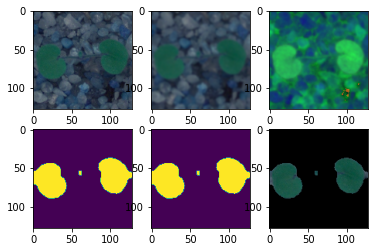

In [12]:
new_train = []
sets = []; getEx = True
for i in images:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV) #Using BGR TO HSV conversion. reason is mentioned above
    #HSV Boundaries for the Green color (GREEN PARAMETERS)
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper) # create a mask 
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)) #getting structring element ( kernal) of sie 11x11
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc) # applying morphological transformation ( closing operation ) to remove imperfections from the binary image ( mask)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i); 
        #print('ORIGINAL')
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)


CLEANED IMAGES


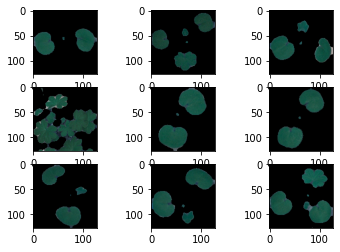

In [13]:
print("CLEANED IMAGES")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(new_train[i])

### Normalizing the dataset

In [14]:

new_train = new_train / 255

## **Making the data compatible:**

- Convert labels from digits to one hot vectors.
- Check the shape of the data. Reshape the data into shapes compatible with Keras models, if already not compatible.


In [15]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [16]:
print(y.shape)
print(new_train.shape)

(4750, 12)
(4750, 128, 128, 3)


In [17]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


## **Splitting the dataset**

- In this step, we are going to split the training dataset for validation. We are using the train_test_split() function from scikit-learn. 
- Here we are splitting the dataset keeping the test_size=0.2. It means 20% of total data is used as testing data and the other 80% as training data. 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train,y , test_size=0.2, random_state=seed,stratify=y)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3800, 128, 128, 3)
(3800, 12)
(950, 128, 128, 3)
(950, 12)


### We have used **stratify** to get an almost equal distribution of classes in the test and train set. Checking the class proportion for both the sets. 

In [20]:
pd.DataFrame(y_train.argmax(axis=1)).value_counts()/pd.DataFrame(y_train.argmax(axis=1)).value_counts().sum()

6     0.137632
3     0.128684
8     0.108684
10    0.104474
5     0.100000
1     0.082105
11    0.081053
2     0.060263
0     0.055263
9     0.048684
4     0.046579
7     0.046579
dtype: float64

In [21]:
pd.DataFrame(y_test.argmax(axis=1)).value_counts()/pd.DataFrame(y_test.argmax(axis=1)).value_counts().sum()


6     0.137895
3     0.128421
8     0.108421
10    0.104211
5     0.100000
1     0.082105
11    0.081053
2     0.061053
0     0.055789
9     0.048421
4     0.046316
7     0.046316
dtype: float64

So, we can see above that the data was already compatible with Keras, as the shape of the data before and after reshaping is the same.

## **Building the CNN:**

- Define layers.
- Set the optimizer and loss function. 

In [22]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
#from tf.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

# Set the CNN model 
batch_size=None


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                      

2022-05-07 07:27:29.285283: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-07 07:27:29.285370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
#Defining thr optimizer and loss function 
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [24]:
# fitting the model with epochs = 50 
history=model.fit(X_train, y_train, epochs = 50, validation_split=0.1,batch_size = batch_size)

Epoch 1/50


2022-05-07 07:27:29.614629: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-07 07:27:29.871131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


107/107 [==============================] - ETA: 0s - loss: 2.3183 - accuracy: 0.2085

2022-05-07 07:27:40.034744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


107/107 [==============================] - 11s 97ms/step - loss: 2.3183 - accuracy: 0.2085 - val_loss: 2.1726 - val_accuracy: 0.3105
Epoch 2/50
107/107 [==============================] - 10s 94ms/step - loss: 2.0172 - accuracy: 0.2977 - val_loss: 1.9994 - val_accuracy: 0.3921
Epoch 3/50
107/107 [==============================] - 10s 93ms/step - loss: 1.8666 - accuracy: 0.3374 - val_loss: 2.0035 - val_accuracy: 0.2737
Epoch 4/50
107/107 [==============================] - 10s 91ms/step - loss: 1.6997 - accuracy: 0.4018 - val_loss: 1.7047 - val_accuracy: 0.3895
Epoch 5/50
107/107 [==============================] - 10s 91ms/step - loss: 1.4609 - accuracy: 0.4939 - val_loss: 1.5771 - val_accuracy: 0.4789
Epoch 6/50
107/107 [==============================] - 10s 91ms/step - loss: 1.3365 - accuracy: 0.5368 - val_loss: 1.3338 - val_accuracy: 0.5447
Epoch 7/50
107/107 [==============================] - 10s 91ms/step - loss: 1.2048 - accuracy: 0.5860 - val_loss: 1.2526 - val_accuracy: 0.6447
Epo

## **Plotting the training and validation accuracy:**

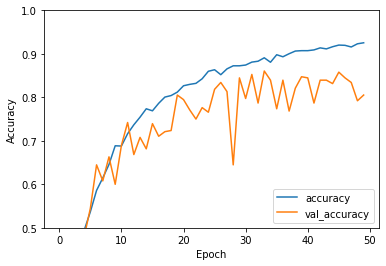

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

In [26]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2022-05-07 07:36:09.519352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.6121572256088257
Test accuracy: 0.818947434425354




- Validation accuracy is approximately constant after the 30th epoch. 
- We wil reduce the learning rate when the validation loss does not change.
- Model is slightly overfitting after the 30-35th epoch. 
- Therefore, let's use some techniques to prevent overfitting. 

### **Preventing overfitting**

Overfitting is a problem in machine learning in which our model performs very well on the training data but performs poorly on testing data.

**The problem of overfitting is more in deep learning**, since the neural network automatically detects several features and builds a complex mathematical model with several layers to map the input to the output. The tendency of deep neural networks to overfit to the training dataset could affects our end result badly, so this issue has to be addressed immediately.

There are many **regularization techniques** to overcome overfitting: 

1) Dropout

2) Data Augmentation

3) Batch normalization

We will use Data augmentation here to prevent overfitting.

Here, we are using the ImageDataGenerator() function which randomly changes the characteristics of images and provides randomness in the data.

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. 
- This may start decreasing the loss at a smaller learning rate. 
- There is a possibility that the loss may still not decrease. 
- This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [27]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

## **Data Augmentation (Regularization)**

- Data Augmentation is a strategy to significantly increase the diversity of data available for training models, without actually collecting new data.
- Data Augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks in order to help regularize them and reduce overfitting.



In [28]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [29]:
X_train.shape

(3800, 128, 128, 3)

**Dividing the training data into train and validation/dev set from X_train**

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train , test_size=0.1, random_state=seed,stratify=y_train)

In [31]:
X_train.shape


(3420, 128, 128, 3)

### **Defining the model**

In [32]:
# Set the CNN model 
batch_size=None
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))


model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.2))


model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.4))



model1.add(GlobalMaxPooling2D())
model1.add(Dense(256, activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(12, activation = "softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        36928     
                                                      

In [33]:
#Defining optimizer and loss function 
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [34]:
#Fitting the model using fit_generator function 
#X_train, X_val, y_train, y_test
batch_size = 38
history1 = model1.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


2022-05-07 07:36:11.304740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-07 07:36:20.710723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 10s - loss: 2.3301 - accuracy: 0.2032 - val_loss: 2.1934 - val_accuracy: 0.2605 - lr: 0.0010 - 10s/epoch - 111ms/step
Epoch 2/30
90/90 - 9s - loss: 2.0727 - accuracy: 0.2760 - val_loss: 1.9979 - val_accuracy: 0.3421 - lr: 0.0010 - 9s/epoch - 105ms/step
Epoch 3/30
90/90 - 9s - loss: 1.9422 - accuracy: 0.3064 - val_loss: 1.8876 - val_accuracy: 0.3632 - lr: 0.0010 - 9s/epoch - 105ms/step
Epoch 4/30
90/90 - 9s - loss: 1.7998 - accuracy: 0.3722 - val_loss: 1.6993 - val_accuracy: 0.3895 - lr: 0.0010 - 9s/epoch - 105ms/step
Epoch 5/30
90/90 - 9s - loss: 1.5785 - accuracy: 0.4345 - val_loss: 1.5108 - val_accuracy: 0.5368 - lr: 0.0010 - 9s/epoch - 105ms/step
Epoch 6/30
90/90 - 9s - loss: 1.4371 - accuracy: 0.4883 - val_loss: 1.3739 - val_accuracy: 0.5526 - lr: 0.0010 - 9s/epoch - 105ms/step
Epoch 7/30
90/90 - 9s - loss: 1.3275 - accuracy: 0.5386 - val_loss: 1.2954 - val_accuracy: 0.5868 - lr: 0.0010 - 9s/epoch - 105ms/step
Epoch 8/30
90/90 - 9s - loss: 1.2479 - accuracy: 0.5675 - val_lo

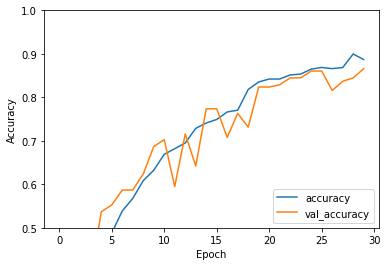

In [35]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

As you can see from the learning graph, **the overfitting has been reduced.** The model is **generalizing well to the validation set.**

In [36]:
# Evaluate the model.

score = model1.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2022-05-07 07:40:56.423831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.3672117590904236
Test accuracy: 0.8705263733863831


As you can see, we are getting better inference accuracy here.

## **Plotting the confusion matrix:**

2022-05-07 07:40:57.356062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


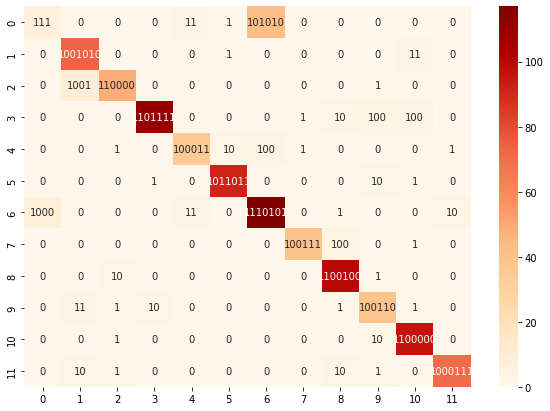

In [37]:
# Predict the values from the validation dataset
Y_pred = model1.predict(X_test)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='b',cmap="OrRd");

## **Visualizing the prediction:**

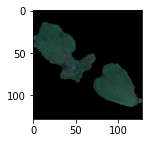

Predicted Label 2
True Label 2


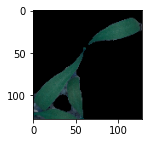

Predicted Label 11
True Label 11


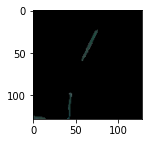

Predicted Label 6
True Label 6


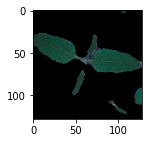

Predicted Label 5
True Label 5


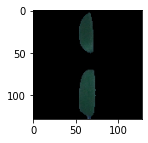

Predicted Label 5
True Label 5


In [38]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

## **Conclusion:**

- The model accuracy becomes constant after the 25-30th epoch.
- Reducing learning rate works well for reducing overfitting.

- Data Augmentation works as a regularizer and helps to reduce the variance in the training and increases the generalization of the model.
